In [1]:
import sys
sys.path.insert(0 , '/home/arpit/study/ML/github')

In [2]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
#to plot the discrete data points
def discrete_scatter (X , y , mark , classes , markwidth, marksize , ax):
    colors = [ 'red' , 'yellow', 'blue' , 'green' , 'purple' , 'brown' , 'black' , 'gray' , 'olive' , 'cyan']
    for i in range(classes):
        temp = X[y == i]
        ax.scatter(temp[: , 0 ] , temp[: , 1] , s = marksize , linewidth = markwidth , 
                   edgecolor= 'black' , label = "Class " + str(i) , marker = mark , color = colors[i])
    return ax

Text(0.5,1,'Original data points')

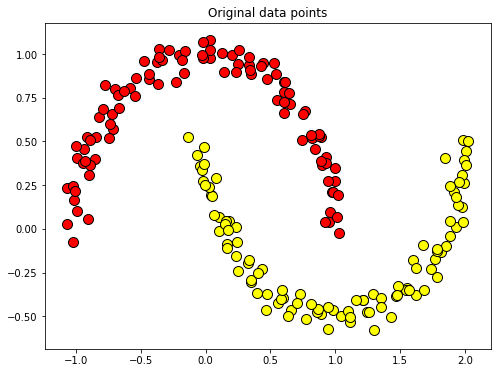

In [24]:
#we are now going to compare the perforamances on the real life dataset
#There are metrics that can be used to see how well the algorithm is performing relative to a ground truth clustering
#The most important ones are : adjusted rand index (ARI) and normalized mutual information (NMI)
#there values are going to lie between 0 and 1
#let's compare all of this on a two moon data set
#We will also see when we just randomly assigns points to the cluster points

from sklearn.datasets import make_moons
X , y = make_moons(random_state = 0 , noise = 0.05 , n_samples = 200)

#plotting the data 
plt.figure(figsize = (8 , 6))
discrete_scatter(X , y , 'o' , y.max() + 1 , 1 , 100 , plt.gca())
plt.title("Original data points")

Text(0.5,1,'DBSCAN : 1.00')

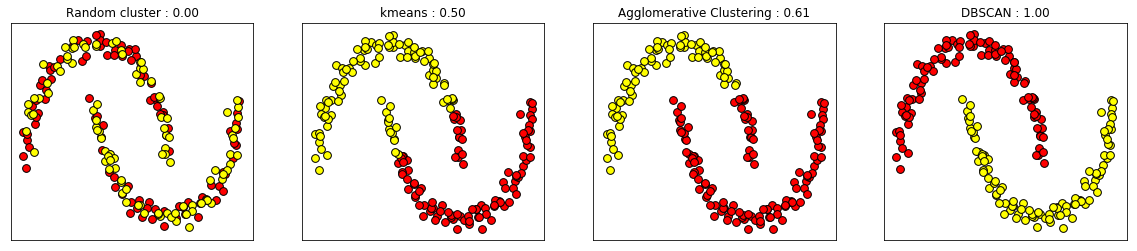

In [49]:
#importing all the methods
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

#Importing the metric
from sklearn.metrics.cluster import adjusted_rand_score

#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#creating the random cluster
random_state = np.random.RandomState(seed = 0)
random_clusters = random_state.randint(low = 0 , high = 2 , size = len(X))

fig , axes = plt.subplots(1 , 4 , figsize = (20 , 4) , 
                         subplot_kw = {'xticks' : () , 'yticks' : ()})

discrete_scatter (X_scaled , random_clusters , 'o' , 2 , 1 ,60 , axes[0])
axes[0].set_title("Random cluster : {:.2f}" .format(adjusted_rand_score( y , random_clusters))) 

#using the kmeans
kmean = KMeans(n_clusters = 2)
kmean.fit(X_scaled)


discrete_scatter (X_scaled , kmean.labels_ , 'o' , 2 , 1 ,60 , axes[1])
axes[1].set_title("kmeans : {:.2f}" .format(adjusted_rand_score( kmean.labels_ , y))) 

#using the Agglomerative clustering
agg = AgglomerativeClustering(n_clusters = 2)
pred = agg.fit_predict(X_scaled)
discrete_scatter (X_scaled , pred , 'o' , 2 , 1 ,60 , axes[2])
axes[2].set_title("Agglomerative Clustering : {:.2f}" .format(adjusted_rand_score( pred , y))) 

#using the DBSCAN
dbscan = DBSCAN()
pred = dbscan.fit_predict(X_scaled)
discrete_scatter (X_scaled , pred , 'o' , 2 , 1 ,60 , axes[3])
axes[3].set_title("DBSCAN : {:.2f}" .format(adjusted_rand_score( pred , y))) 


In [55]:
#please note that accuracy_score is different from accuracy_score
from sklearn.metrics import accuracy_score
clusters1 =[0 , 0 , 1,  1, 0]
clusters2 =[1, 1, 0 , 0 , 1]
print("Accuracy score : " , accuracy_score(clusters1 , clusters2))
print("ARI : " , adjusted_rand_score(clusters1 , clusters2))
#you can see the difference here
#only thing that matters is which points are in which cluster

Accuracy score :  0.0
ARI :  1.0


Text(0.5,1,'DBSCAN : 0.38')

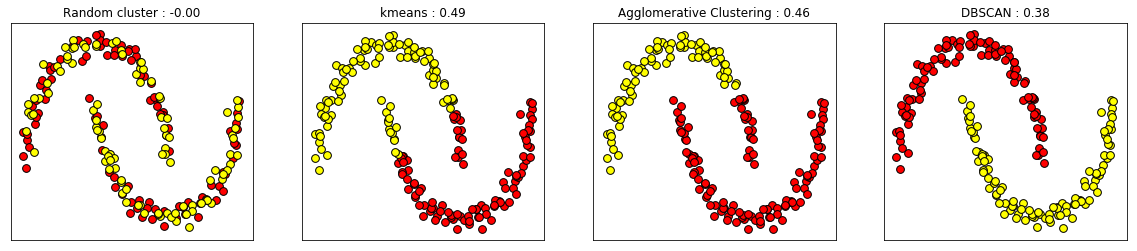

In [59]:
#Analysis without the ground truth
#There are scoring metrics which do not require the ground truth
#One is silhoutte coefficient
#It calculates the compactness of the model , the higher the better
#These often do not work well in practice , since compactness do not allow complex shapes

from sklearn.metrics.cluster import silhouette_score

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#creating the random cluster
random_state = np.random.RandomState(seed = 0)
random_clusters = random_state.randint(low = 0 , high = 2 , size = len(X))

fig , axes = plt.subplots(1 , 4 , figsize = (20 , 4) , 
                         subplot_kw = {'xticks' : () , 'yticks' : ()})

discrete_scatter (X_scaled , random_clusters , 'o' , 2 , 1 ,60 , axes[0])
axes[0].set_title("Random cluster : {:.2f}" .format(silhouette_score(X_scaled , random_clusters))) 

#using the kmeans
kmean = KMeans(n_clusters = 2)
kmean.fit(X_scaled)


discrete_scatter (X_scaled , kmean.labels_ , 'o' , 2 , 1 ,60 , axes[1])
axes[1].set_title("kmeans : {:.2f}" .format(silhouette_score(X_scaled , kmean.labels_ ))) 

#using the Agglomerative clustering
agg = AgglomerativeClustering(n_clusters = 2)
pred = agg.fit_predict(X_scaled)
discrete_scatter (X_scaled , pred , 'o' , 2 , 1 ,60 , axes[2])
axes[2].set_title("Agglomerative Clustering : {:.2f}" .format(silhouette_score(X_scaled , pred ))) 

#using the DBSCAN
dbscan = DBSCAN()
pred = dbscan.fit_predict(X_scaled)
discrete_scatter (X_scaled , pred , 'o' , 2 , 1 ,60 , axes[3])
axes[3].set_title("DBSCAN : {:.2f}" .format(silhouette_score(X_scaled , pred ))) 

#as you can see kmeans is getting the best score which is not true as per the ground truth
#DBSCAN is getting the least when using this approach

In [63]:
#Now let's apply all the clustering algorithms to the face dataset
#Now applying different methods to represent the data
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20 , resize = 0.7)

#so we need to correct the dataset
#So we make only upto 50 images of each person
mask = np.zeros (people.target.shape , dtype = np.bool)
for target in np.unique(people.target):                    #np.unique returns the unique image sorted order
    mask[np.where(people.target == target)[0][:50]] = 1    #takes a maximum of 50 images of each person
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255

#this block is to import the face data set

In [65]:
#applying pca on the face data set
from sklearn.decomposition import PCA
pca = PCA(n_components = 100 , whiten = True , random_state = 0)
pca.fit(X_people)
X_pca = pca.transform(X_people)

In [66]:
#Analysing the face data set with DBSCAN
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_people)

In [68]:
#printing the unique labels
print("Unique label : " , np.unique(labels))
#as you can see , dbscan is classifying all the points as the noise
#this is because it uses the default value of eps which is very small

Unique label :  [-1]


In [70]:
#To correct first we are going to change the min_samples
#To correct this we have to either make eps higher and min_samples lower
#so first lowering the min_samples to expand the small group of points into clusters
dbscan = DBSCAN(min_samples = 3)
labels = dbscan.fit_predict(X_people)

In [72]:
#printing the unique labels
print("Unique labels : " , np.unique(labels))
#it is still not working

Unique labels :  [-1]


In [84]:
#we need to increase eps
dbscan = DBSCAN(min_samples = 3 , eps = 15)
labels = dbscan.fit_predict(X_people)

In [85]:
print("Unique labels : "  ,np.unique(labels) )
#there are two labels
#We can use this info to see how looks like , when compared to the raw data

Unique labels :  [-1  0]


In [86]:
#we are going to count the number of data points in each class
#So use np.bincount()
#but since bincount do not take negative values so we need to add 1 to this
print("Number of points per cluster : \n" , np.bincount(labels + 1))
#since there are very few noise , so we can see all of them

Number of points per cluster : 
 [  11 2052]


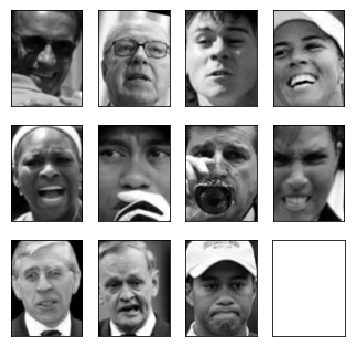

In [88]:
noise = X_people[labels == -1]
fig , axes = plt.subplots(3 , 4 , figsize = (6 , 6) , 
                         subplot_kw = {'xticks' : () , 'yticks' : ()})

image_shape = people.images[0].shape
for image , ax in zip(noise , axes.ravel()):
    ax.imshow(image.reshape(image_shape) , cmap= 'gray')
    
#We can see why they are classified as noise
#this kind of analysis trying to find the odd one out is called outlier detection
#people are wearing hat in this

In [89]:
#lets see how the algo performs for different value of eps
for eps in [1 , 3 , 5 , 7, 9 , 11 , 13]:
    dbscan = DBSCAN(min_samples = 3 , eps =eps)
    labels = dbscan.fit_predict(X_people)
    print("Eps = " , eps)
    print("Unique labels : " , np.unique(labels))
    print("Number of data points per cluster : " , np.bincount(labels+1))
    print()

Eps =  1
Unique labels :  [-1]
Number of data points per cluster :  [2063]

Eps =  3
Unique labels :  [-1]
Number of data points per cluster :  [2063]

Eps =  5
Unique labels :  [-1]
Number of data points per cluster :  [2063]

Eps =  7
Unique labels :  [-1  0  1  2  3  4  5  6  7]
Number of data points per cluster :  [2032    4    3    4    3    4    5    4    4]

Eps =  9
Unique labels :  [-1  0  1  2  3]
Number of data points per cluster :  [1399  654    3    4    3]

Eps =  11
Unique labels :  [-1  0  1]
Number of data points per cluster :  [ 437 1623    3]

Eps =  13
Unique labels :  [-1  0]
Number of data points per cluster :  [  91 1972]



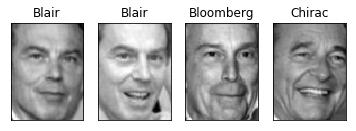

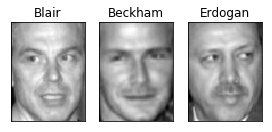

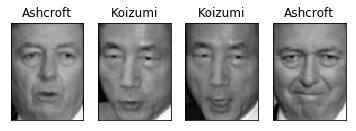

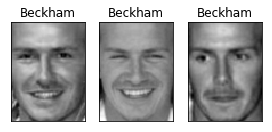

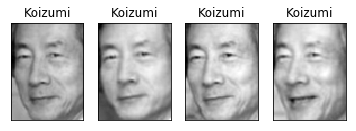

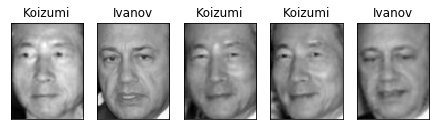

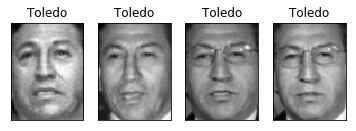

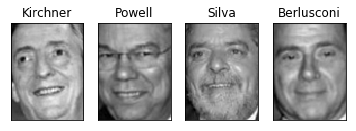

In [91]:
#since there are various clusters in DBSCAN when eps = 7, lets see all the images
dbscan = DBSCAN(eps = 7 , min_samples = 3 )
labels = dbscan.fit_predict(X_people)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_people = np.sum(mask)
    fig , axes = plt.subplots(1 , n_people , figsize = (1.5 * n_people , 4) , 
                             subplot_kw = {'xticks' : () , 'yticks' : ()})
    for image , ax , title in zip (X_people[mask] , axes.ravel() , y_people[mask] ):
        ax.imshow(image.reshape(image_shape) , cmap = 'gray')
        ax.set_title(people.target_names[title].split()[-1])
        
#The result of this is that many of the faces are same

In [92]:
#Analysing the face dataset with the kmeans
#We have seen that it is not possible to create more than one cluster using DBSCAN
#kmeans is tend to create clusters of equal size
#We are going to start with the lower number of cluster , say 10
kmeans = KMeans (n_clusters = 10)
labels = kmeans.fit_predict(X_people)

In [95]:
print("Number of people per cluster : " , np.bincount(labels))
#as expected the clusters are almost of the same size
#this is very different from DBSCAN

Number of people per cluster :  [154 194 186 248 175 182 227 192 335 170]


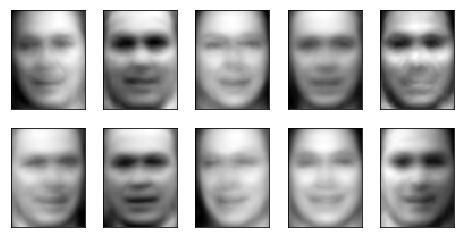

In [101]:
#now plotting the cluster point 
fig , axes = plt.subplots (2 , 5 , figsize = (8 , 4) , 
                          subplot_kw = {'xticks' : () , 'yticks' : ()})
for center , ax in zip (kmeans.cluster_centers_ , axes.ravel()):
    ax.imshow(center.reshape(image_shape) , cmap = 'gray')
    
#the cluster centers found with this are very smooth faces as expected
#This is because of the relatively large cluster size
#it may be noted that the clustering seem to pick different expressions

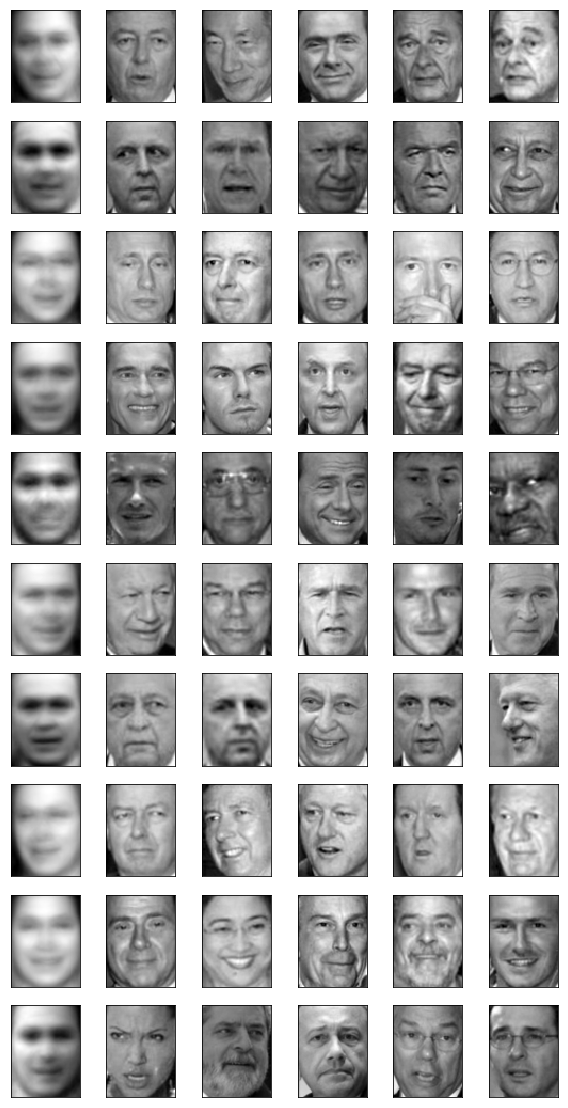

In [119]:
#plotting five most similar faces to the cluster points
fig , axes = plt.subplots(10 , 6 , figsize = (10 , 20) , 
                         subplot_kw = {'xticks' : () , 'yticks' : ()})

for cluster in range(10):
    center = kmeans.cluster_centers_[cluster]
    axes[cluster , 0].imshow(center.reshape(image_shape) , cmap = 'gray')
    
    mask = kmeans.labels_ == cluster
    dists = np.sum( (X_people - center) ** 2 , axis= 1)
    dists[~mask] = np.inf
    inds = np.argsort(dists)[:5]
    
    for image , ax in zip (X_people[inds] , axes[cluster , 1:]):
        ax.imshow(image.reshape(image_shape) , cmap = 'gray')

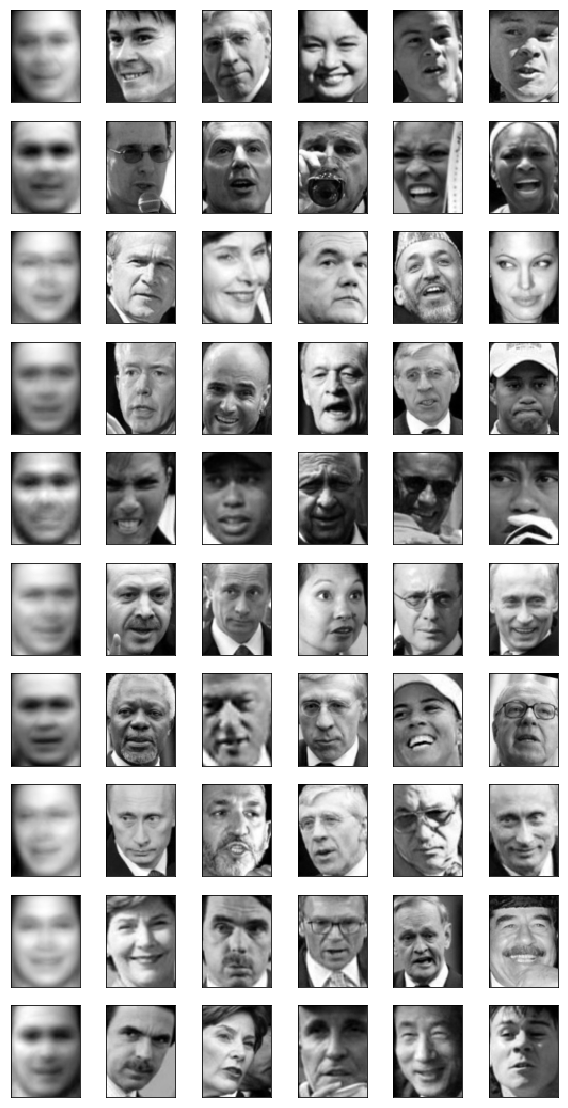

In [117]:
#plotting the most dissimilar faces
fig , axes = plt.subplots(10 , 6 , figsize = (10, 20) , 
                         subplot_kw = {'xticks' : () , 'yticks' : ()})

for cluster in range(10):
    center = kmeans.cluster_centers_[cluster]
    axes[cluster , 0].imshow(center.reshape(image_shape) , cmap = 'gray')
    
    mask = kmeans.labels_ == cluster
    dists = np.sum((center - X_people) ** 2 , axis = 1)
    
    dists[~mask] = -np.inf
    
    inds = np.r_[np.argsort(dists)[-5 :]]
    for image , ax in zip (X_people[inds] , axes[cluster, 1:]):
        ax.imshow(image.reshape(image_shape) , cmap = 'gray')
#since these are the most dissimilar points so they are basically noise

In [127]:
#now the analysis with the agglomerativa clustering
agg = AgglomerativeClustering(n_clusters = 10)
labels = agg.fit_predict(X_people)
print("CLuster size agglomerative clustering : " , np.bincount(labels))

CLuster size agglomerative clustering :  [169 660 144 329 217  85  18 261  31 149]


In [129]:
#we can also compute the ARI for the analysis
print("ARI : " , adjusted_rand_score(labels , y_people))
#this means they have very little in common

ARI :  0.013625203054349229


Text(0.5,1,'Dendrogram')

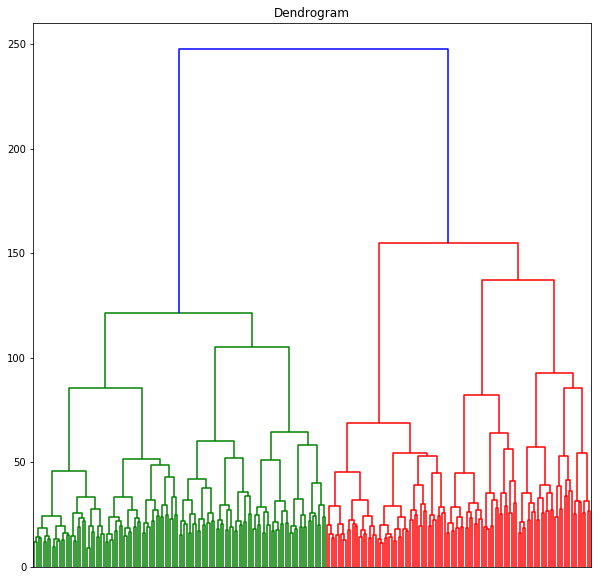

In [135]:
#now we are going to plot the dendrogram
from scipy.cluster.hierarchy import dendrogram , ward
linkage_array = ward(X_people)
plt.figure(figsize = (10 , 10))
dendrogram(linkage_array , p=7 , truncate_mode = 'level', no_labels = True)
plt.title("Dendrogram")

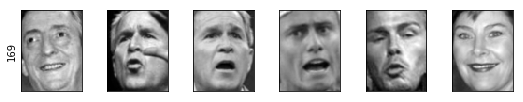

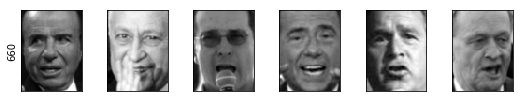

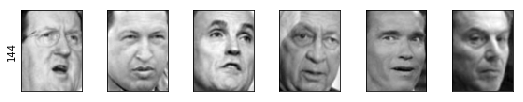

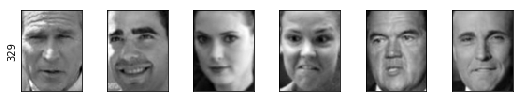

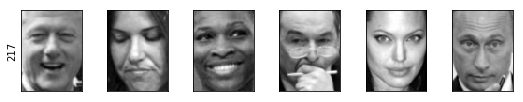

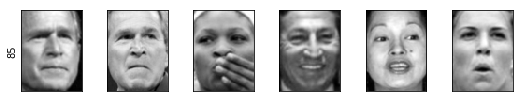

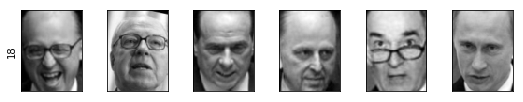

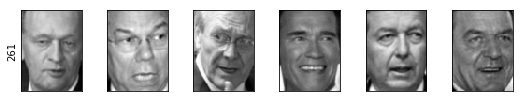

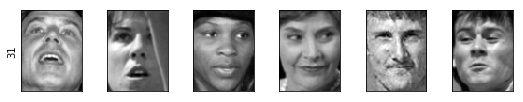

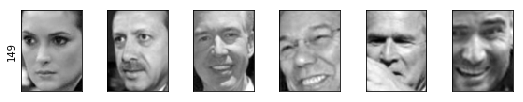

In [146]:
#lets see some of the images of each cluster
#we are going to see just the couple of images for each cluster
for cluster in range(10):
    fig , axes = plt.subplots(1 , 6 , figsize = (9 , 1.5) , 
                         subplot_kw = {'xticks' : () , 'yticks' : ()})
    axes[0].set_ylabel(np.sum(labels == cluster))
    for image , ax in zip (X_people[labels == cluster] , axes.ravel()):
        ax.imshow(image.reshape(image_shape) , cmap = 'gray')
        
#each row correspond to one cluster
#Since the number of clusters is very small , so the result is not that remarkable
#these clusters are too large to be homogenous

In [151]:
#to get the cluster with uniform size , increase the size of the clusters
agg = AgglomerativeClustering(n_clusters = 40)
labels = agg.fit_predict(X_people)
print("Cluster size agglomerative clustering : \n" , np.bincount(labels))

Cluster size agglomerative clustering : 
 [ 62  60  70  64  47  68  55  45 109  74  70  56  51  60  44  61  50  37
  59  52  34  82  28  45  69  47  11  32  41  54 112  46  17  50  13  46
  44  28  18  52]


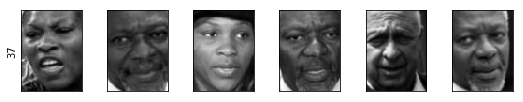

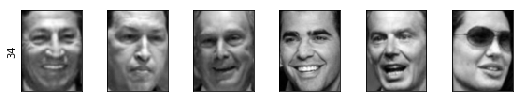

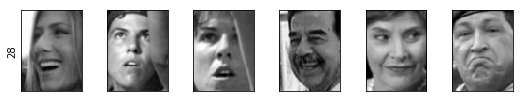

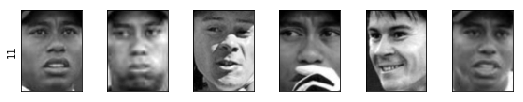

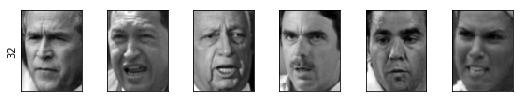

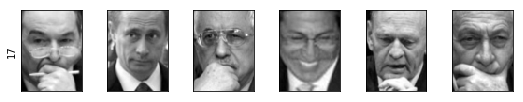

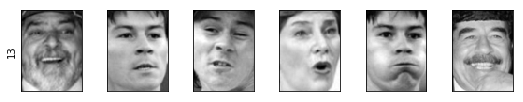

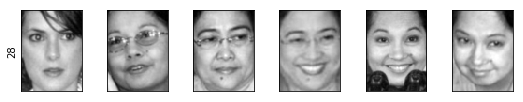

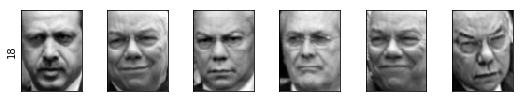

In [155]:
#seeing the face of the first ten clusters
for cluster in range(40):
    if (np.sum(labels == cluster) > 40):
        continue
    fig , axes = plt.subplots(1 , 6 , figsize = (9 , 1.5) , 
                         subplot_kw = {'xticks' : () , 'yticks' : ()})
    axes[0].set_ylabel(np.sum(labels == cluster))
    for ax , image in zip(axes.ravel() , X_people[labels == cluster]):
        ax.imshow(image.reshape(image_shape), cmap = 'gray')
#this time it seems to work better                                             